In [30]:
import math
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

In [31]:
X_train = pd.read_csv('park_train.data').to_numpy()
X_test = pd.read_csv('park_test.data').to_numpy()
Y_train = X_train[:, 0]
X_train = X_train[:, 1:]
Y_test = X_test[:, 0]
X_test = X_test[:, 1:]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(77, 22) (77,) (58, 22) (58,)


In [32]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
model.score(X_test, Y_test)

0.7931034482758621

[Text(0.5555555555555556, 0.9285714285714286, 'X[11] <= 0.014\nentropy = 0.762\nsamples = 77\nvalue = [17, 60]'),
 Text(0.4444444444444444, 0.7857142857142857, 'X[21] <= 0.107\nentropy = 0.992\nsamples = 38\nvalue = [17, 21]'),
 Text(0.3333333333333333, 0.6428571428571429, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5555555555555556, 0.6428571428571429, 'X[1] <= 236.743\nentropy = 0.881\nsamples = 30\nvalue = [9, 21]'),
 Text(0.3333333333333333, 0.5, 'X[20] <= 2.062\nentropy = 0.722\nsamples = 25\nvalue = [5, 20]'),
 Text(0.2222222222222222, 0.35714285714285715, 'X[10] <= 0.007\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.1111111111111111, 0.21428571428571427, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.21428571428571427, 'X[20] <= 1.872\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2222222222222222, 0.07142857142857142, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.07142857142857142, 'entropy

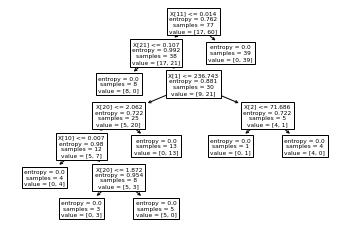

In [34]:
plot_tree(model)

In [35]:
model.get_depth()

6

In [36]:
def H(X):
  entropy = 0

  for x in np.unique(X):
    p = (X == x).sum() / len(X)

    if p > 0:
      entropy -= p * math.log(p)
  
  return entropy

def condH(Y, X):
  entropy = 0

  for x in np.unique(X):
    subset = Y[X == x]
    s = 0

    for y in np.unique(Y):
      p = (subset == y).sum() / len(subset)

      if p > 0:
        s += p * math.log(p)
    
    entropy += s * (X == x).sum() / len(X)
  
  return -entropy

def ig(Y, X):
  return H(Y) - condH(Y, X)

class DecisionTree:
  def __init__(self, X, Y, depth=0, maxdepth=16):
    self.value = None
    self.X = X
    self.Y = Y

    if len(np.unique(self.Y)) == 1:
      self.value = self.Y[0]
    elif depth == maxdepth:
      vals, counts = np.unique(self.Y, return_counts=True)
      self.value = vals[np.argwhere(counts == np.max(counts))].flatten()[0]
    else:
      self.attr = None
      best_ig = None

      for i in range(self.X.shape[1]):
        attr_ig = ig(self.Y, self.X[:, i])

        if self.attr == None or attr_ig > best_ig:
          self.attr = i
          best_ig = attr_ig
      
      self.threshold = self.X[:, self.attr].mean()
      ge_i = np.where(self.X[:, self.attr] >= self.threshold)[0]

      if len(ge_i) > 0:
        self.ge = DecisionTree(self.X[ge_i], self.Y[ge_i], depth=depth + 1, maxdepth=maxdepth)

      lt_i = np.where(self.X[:, self.attr] < self.threshold)[0]
      
      if len(lt_i) > 0:
        self.lt = DecisionTree(self.X[lt_i], self.Y[lt_i], depth=depth + 1, maxdepth=maxdepth)

      if len(lt_i) == 0:
        self.lt = self.ge
      elif len(ge_i) == 0:
        self.ge = self.lt
  
  def predict(self, X):
    if self.value != None:
      return self.value
    
    if X[self.attr] >= self.threshold:
      return self.ge.predict(X)
    
    return self.lt.predict(X)

In [37]:
tree = DecisionTree(X_train, Y_train)

In [38]:
(np.array([tree.predict(x) for x in X_test]) == Y_test).mean()

0.7241379310344828

In [39]:
ada_model = AdaBoostClassifier(n_estimators=256)
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=256)

In [40]:
ada_model.score(X_test, Y_test)

0.8448275862068966